In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import Image
from scipy.stats import sem
from scipy.stats import linregress

In [2]:
mortality_ca = pd.read_csv("Resources/mortality_2006_2010_clean.csv")
pollution_ca = pd.read_csv("Resources/pollution_2006_2010.csv")

In [3]:
diseases = mortality_ca["ICD-10 113 Cause List"].unique().tolist()
print(diseases, len(diseases))

['Influenza and pneumonia (J09-J18)', 'Pneumonia (J12-J18)', 'Chronic lower respiratory diseases (J40-J47)', 'Bronchitis, chronic and unspecified (J40-J42)', 'Emphysema (J43)', 'Asthma (J45-J46)', 'Other chronic lower respiratory diseases (J44,J47)', 'Pneumonitis due to solids and liquids (J69)', 'Other diseases of respiratory system (J00-J06,J30- J39,J67,J70-J98)', 'Influenza (J09-J11)'] 10


In [4]:
counties_list = pollution_ca["County"].unique().tolist()
print(counties_list, len(counties_list))

['Contra Costa', 'Humboldt', 'Imperial', 'Los Angeles', 'Orange', 'Riverside', 'Sacramento', 'San Bernardino', 'San Diego', 'San Francisco', 'Santa Barbara', 'Santa Cruz', 'Solano', 'Alameda', 'Fresno', 'Santa Clara'] 16


In [5]:
clrd_mortality = mortality_ca[mortality_ca["ICD-10 113 Cause List"] == 
                                         "Chronic lower respiratory diseases (J40-J47)"]
# clrd_mortality.head()

In [6]:
grouped_clrd = clrd_mortality.groupby(["County", "Year"])["Deaths"].agg([np.sum])
grouped_clrd1 = grouped_clrd.rename(columns={"sum": "Death"})
grouped_clrd1

Death
County  Year       
Alameda 2006  422.0
        2007  405.0
        2008  455.0
        2009  419.0
        2010  399.0
...             ...
Solano  2006  143.0
        2007  127.0
        2008  125.0
        2009  137.0
        2010  163.0

[80 rows x 1 columns]

In [7]:
# Death by county
grouped_clrd2 = grouped_clrd1.reset_index()
grouped_clrd2

,County,Year,Death
0,Alameda,2006,422.0
1,Alameda,2007,405.0
2,Alameda,2008,455.0
3,Alameda,2009,419.0
4,Alameda,2010,399.0
...,...,...,...
75,Solano,2006,143.0
76,Solano,2007,127.0
77,Solano,2008,125.0
78,Solano,2009,137.0


In [8]:
x = grouped_clrd2

In [9]:
x

,County,Year,Death
0,Alameda,2006,422.0
1,Alameda,2007,405.0
2,Alameda,2008,455.0
3,Alameda,2009,419.0
4,Alameda,2010,399.0
...,...,...,...
75,Solano,2006,143.0
76,Solano,2007,127.0
77,Solano,2008,125.0
78,Solano,2009,137.0


In [10]:
total_deaths_by_county = x.groupby(["County"]).sum()

In [11]:
total_deaths_by_county1 = total_deaths_by_county.reset_index()
total_deaths_by_county1 = total_deaths_by_county1.drop("Year",1)
total_deaths_by_county1

,County,Death
0,Alameda,2100.0
1,Contra Costa,1933.0
2,Fresno,1367.0
3,Humboldt,402.0
4,Imperial,193.0
5,Los Angeles,14468.0
6,Orange,4434.0
7,Riverside,4533.0
8,Sacramento,2751.0
9,San Bernardino,4017.0


In [12]:
pollution_ca.head()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN


In [13]:
carbon_monoxide_pollutants = pollution_ca.groupby("County")["CO AQI"].agg([np.sum])
carbon_monoxide_pollutants1 = carbon_monoxide_pollutants.rename(columns={"sum": "CO AQI"})
carbon_monoxide_pollutants2 = carbon_monoxide_pollutants1.reset_index()
carbon_monoxide_pollutants2

,County,CO AQI
0,Alameda,12156.0
1,Contra Costa,58074.0
2,Fresno,16522.0
3,Humboldt,11549.0
4,Imperial,50846.0
5,Los Angeles,120576.0
6,Orange,19764.0
7,Riverside,28642.0
8,Sacramento,42322.0
9,San Bernardino,30728.0


In [14]:
co_merge = pd.merge(carbon_monoxide_pollutants2, total_deaths_by_county1)
co_merge

,County,CO AQI,Death
0,Alameda,12156.0,2100.0
1,Contra Costa,58074.0,1933.0
2,Fresno,16522.0,1367.0
3,Humboldt,11549.0,402.0
4,Imperial,50846.0,193.0
5,Los Angeles,120576.0,14468.0
6,Orange,19764.0,4434.0
7,Riverside,28642.0,4533.0
8,Sacramento,42322.0,2751.0
9,San Bernardino,30728.0,4017.0


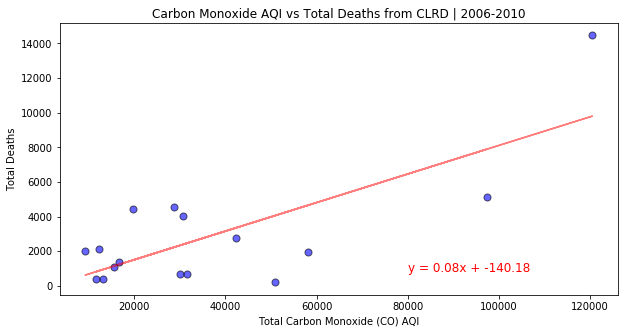

In [15]:
x_values = co_merge["CO AQI"]
y_values = co_merge["Death"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.5)
plt.annotate(line_eq,(80000,800),fontsize=12,color="red")
plt.xlabel("Total Carbon Monoxide (CO) AQI")
plt.ylabel("Total Deaths")
plt.title("Carbon Monoxide AQI vs Total Deaths from CLRD | 2006-2010")
plt.show()

In [16]:
corr = co_merge.corr(method="pearson")
corr.style.background_gradient(cmap="coolwarm")

,CO AQI,Death
CO AQI,1.000000,0.754385
Death,0.754385,1.000000


In [17]:
print(f"The r-value for Carbon Monoxide (CO) is: {rvalue}")

The r-value for Carbon Monoxide (CO) is: 0.7543850834952978


In [18]:
nitrogen_dioxide_pollutants = pollution_ca.groupby("County")["NO2 AQI"].agg([np.sum])
nitrogen_dioxide_pollutants1 = nitrogen_dioxide_pollutants.rename(columns={"sum": "NO2 AQI"})
nitrogen_dioxide_pollutants2 = nitrogen_dioxide_pollutants1.reset_index()
nitrogen_dioxide_pollutants2

,County,NO2 AQI
0,Alameda,103352
1,Contra Costa,419036
2,Fresno,151956
3,Humboldt,43046
4,Imperial,227724
5,Los Angeles,1043904
6,Orange,172436
7,Riverside,213462
8,Sacramento,271950
9,San Bernardino,392084


In [19]:
no2_merge = pd.merge(nitrogen_dioxide_pollutants2, total_deaths_by_county1)
no2_merge

,County,NO2 AQI,Death
0,Alameda,103352,2100.0
1,Contra Costa,419036,1933.0
2,Fresno,151956,1367.0
3,Humboldt,43046,402.0
4,Imperial,227724,193.0
5,Los Angeles,1043904,14468.0
6,Orange,172436,4434.0
7,Riverside,213462,4533.0
8,Sacramento,271950,2751.0
9,San Bernardino,392084,4017.0


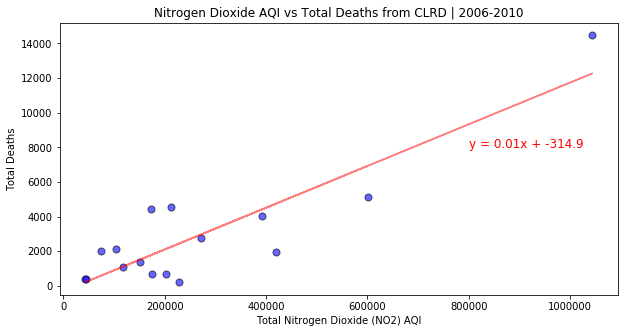

In [20]:
x_values = no2_merge["NO2 AQI"]
y_values = no2_merge["Death"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.5)
plt.annotate(line_eq,(800000,8000),fontsize=12,color="red")
plt.xlabel("Total Nitrogen Dioxide (NO2) AQI")
plt.ylabel("Total Deaths")
plt.title("Nitrogen Dioxide AQI vs Total Deaths from CLRD | 2006-2010")
plt.show()

In [21]:
corr = no2_merge.corr(method="pearson")
corr.style.background_gradient(cmap="coolwarm")

,NO2 AQI,Death
NO2 AQI,1.000000,0.882778
Death,0.882778,1.000000


In [22]:
print(f"The r-value for Nitrogen Dioxide (NO2) is: {rvalue}")

The r-value for Nitrogen Dioxide (NO2) is: 0.8827775793559318


In [25]:
sulphur_dioxide_pollutants = pollution_ca.groupby("County")["SO2 AQI"].agg([np.sum])
sulphur_dioxide_pollutants1 = sulphur_dioxide_pollutants.rename(columns={"sum": "SO2 AQI"})
sulphur_dioxide_pollutants2 = sulphur_dioxide_pollutants1.reset_index()
sulphur_dioxide_pollutants2

,County,SO2 AQI
0,Alameda,7328.0
1,Contra Costa,58900.0
2,Fresno,7206.0
3,Humboldt,2250.0
4,Imperial,11612.0
5,Los Angeles,63070.0
6,Orange,10450.0
7,Riverside,9134.0
8,Sacramento,10149.0
9,San Bernardino,15066.0


In [26]:
so2_merge = pd.merge(sulphur_dioxide_pollutants2, total_deaths_by_county1)
so2_merge

,County,SO2 AQI,Death
0,Alameda,7328.0,2100.0
1,Contra Costa,58900.0,1933.0
2,Fresno,7206.0,1367.0
3,Humboldt,2250.0,402.0
4,Imperial,11612.0,193.0
5,Los Angeles,63070.0,14468.0
6,Orange,10450.0,4434.0
7,Riverside,9134.0,4533.0
8,Sacramento,10149.0,2751.0
9,San Bernardino,15066.0,4017.0


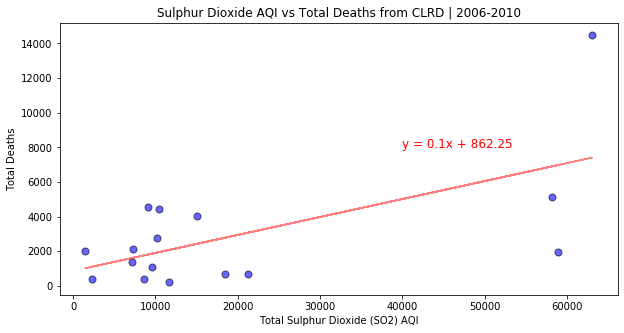

In [32]:
x_values = so2_merge["SO2 AQI"]
y_values = so2_merge["Death"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.5)
plt.annotate(line_eq,(40000,8000),fontsize=12,color="red")
plt.xlabel("Total Sulphur Dioxide (SO2) AQI")
plt.ylabel("Total Deaths")
plt.title("Sulphur Dioxide AQI vs Total Deaths from CLRD | 2006-2010")
plt.show()

In [34]:
corr = so2_merge.corr(method="pearson")
corr.style.background_gradient(cmap="coolwarm")

,SO2 AQI,Death
SO2 AQI,1.000000,0.617040
Death,0.617040,1.000000


In [33]:
print(f"The r-value for Sulphur Dioxide (SO2) is: {rvalue}")

The r-value for Sulphur Dioxide (SO2) is: 0.6170401313230505


In [35]:
ozone_pollutants = pollution_ca.groupby("County")["O3 AQI"].agg([np.sum])
ozone_pollutants1 = ozone_pollutants.rename(columns={"sum": "O3 AQI"})
ozone_pollutants2 = ozone_pollutants1.reset_index()
ozone_pollutants2

,County,O3 AQI
0,Alameda,97980
1,Contra Costa,756928
2,Fresno,309880
3,Humboldt,130782
4,Imperial,274550
5,Los Angeles,955288
6,Orange,248256
7,Riverside,357172
8,Sacramento,470606
9,San Bernardino,550986


In [36]:
o3_merge = pd.merge(ozone_pollutants2, total_deaths_by_county1)
o3_merge

,County,O3 AQI,Death
0,Alameda,97980,2100.0
1,Contra Costa,756928,1933.0
2,Fresno,309880,1367.0
3,Humboldt,130782,402.0
4,Imperial,274550,193.0
5,Los Angeles,955288,14468.0
6,Orange,248256,4434.0
7,Riverside,357172,4533.0
8,Sacramento,470606,2751.0
9,San Bernardino,550986,4017.0


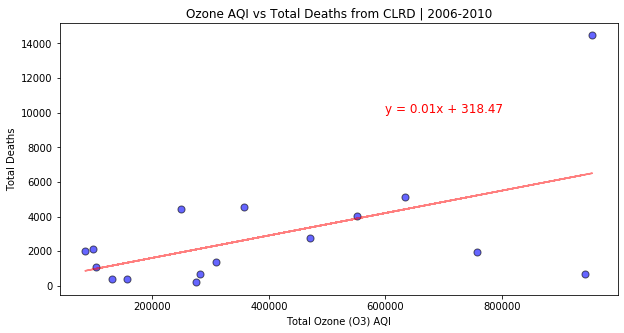

In [46]:
x_values = o3_merge["O3 AQI"]
y_values = o3_merge["Death"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.5)
plt.annotate(line_eq,(600000,10000),fontsize=12,color="red")
plt.xlabel("Total Ozone (O3) AQI")
plt.ylabel("Total Deaths")
plt.title("Ozone AQI vs Total Deaths from CLRD | 2006-2010")
plt.show()

In [47]:
corr = o3_merge.corr(method="pearson")
corr.style.background_gradient(cmap="coolwarm")

,O3 AQI,Death
O3 AQI,1.000000,0.543550
Death,0.543550,1.000000


In [48]:
print(f"The r-value for Ozone (O3) is: {rvalue}")

The r-value for Ozone (O3) is: 0.5435496110691815
